# Criação de Gráficos Candlestick com Matplotlib e Plotly


---
**Contatos:**

*   [LinkedIn](https://www.linkedin.com/in/leonardor99/)
*   [GitHub](https://github.com/ldemmz/)
*   [E-mail](mailto:leonardor99@outlook.com)
---

### O que é um gráfico candlestick?


Também conhecido como gráfico de vela, o candlestick é uma ferramenta visual criada para mostrar o que ocorreu com o preço de uma ação em determinado período de tempo.

De modo geral, o conceito por trás dos candlesticks
são bem simples de se entender. Recomenda-se criarmos gráficos com conjuntos de cores que colaborem para uma melhor interpretação de quem está visualizando. Geralmente usamos a cor verde para esboçar os candles de alta e, vermelho para os de queda.


A figura a seguir ilustra a estrutura de um candle:

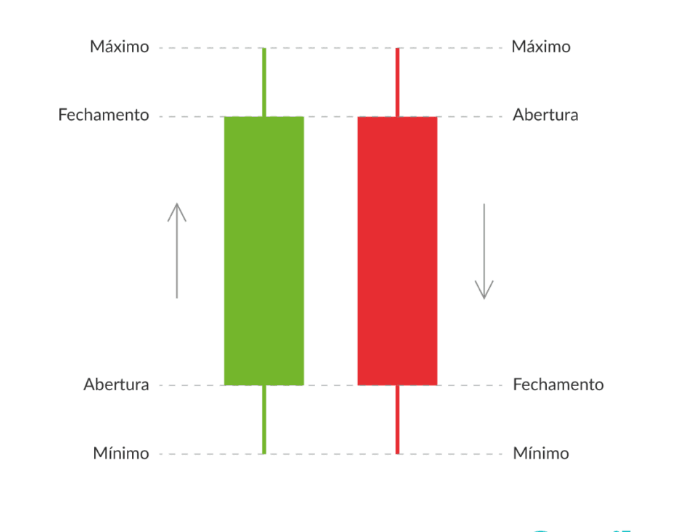

### Partindo para o código...

#### Instalando mplfinance no Colab

Como o Google Colab foi incapaz de reconhecer a biblioteca mplfinance, tornou-se necessário fazer sua instalação.  

In [ ]:
!pip install mplfinance

#### Importando bibliotecas

In [ ]:
#Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#### Baixando dados e visualizando tabela

In [ ]:
# Baixando dados de ações da Apple
dados = yf.download('AAPL', start = '2023-01-01', end='2023-12-31')
# Formatando antecipadamente o display do pandas
pd.options.display.float_format = '{:.2f}'.format
# Visualizando dataframe baixado
dados

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,130.28,130.90,124.17,125.07,124.22,112117500
2023-01-04,126.89,128.66,125.08,126.36,125.50,89113600
2023-01-05,127.13,127.77,124.76,125.02,124.17,80962700
2023-01-06,126.01,130.29,124.89,129.62,128.74,87754700
2023-01-09,130.47,133.41,129.89,130.15,129.26,70790800
...,...,...,...,...,...,...
2023-12-22,195.18,195.41,192.97,193.60,193.35,37122800
2023-12-26,193.61,193.89,192.83,193.05,192.80,28919300
2023-12-27,192.49,193.50,191.09,193.15,192.90,48087700


#### Visualizando detalhes

Usarei a função "describe" para olhar alguns dados a critério de curiosidade.

In [ ]:
dados.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.00,250.00,250.00,250.00,250.00,250.00
mean,172.26,173.86,170.98,172.55,171.90,59217028.80
std,17.53,17.26,17.54,17.33,17.48,17773915.16
min,126.01,127.77,124.17,125.02,124.17,24048300.00
25%,161.56,162.39,160.70,162.11,161.25,47812075.00
50%,175.24,177.03,173.84,175.48,175.02,55077500.00
75%,186.81,188.10,185.17,187.33,186.94,65742925.00
max,198.02,199.62,197.00,198.11,197.86,154357300.00


#### Renomeando colunas

In [ ]:
dados.columns = ['abertura', 'maximo', 'minimo', 'fechamento', 'fech_ajust', 'volume']
dados = dados.rename_axis('data')
dados

,abertura,maximo,minimo,fechamento,fech_ajust,volume
data,,,,,,
2023-01-03,130.28,130.90,124.17,125.07,124.22,112117500
2023-01-04,126.89,128.66,125.08,126.36,125.50,89113600
2023-01-05,127.13,127.77,124.76,125.02,124.17,80962700
2023-01-06,126.01,130.29,124.89,129.62,128.74,87754700
2023-01-09,130.47,133.41,129.89,130.15,129.26,70790800
...,...,...,...,...,...,...
2023-12-22,195.18,195.41,192.97,193.60,193.35,37122800
2023-12-26,193.61,193.89,192.83,193.05,192.80,28919300
2023-12-27,192.49,193.50,191.09,193.15,192.90,48087700


#### Plotagem no matplotlib

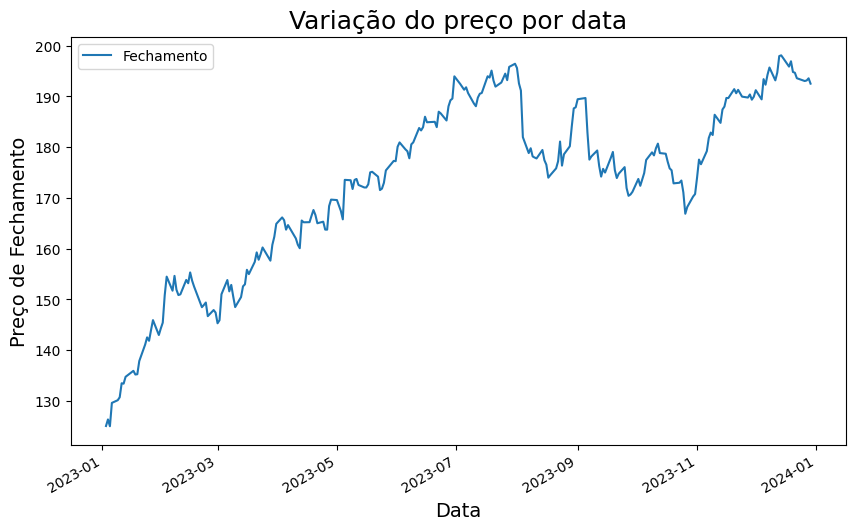

In [ ]:
dados['fechamento'].plot(figsize=(10,6))
plt.title('Variação do preço por data', fontsize=18) #Título
plt.xlabel('Data', fontsize=14)  # Título do eixo X
plt.ylabel('Preço de Fechamento', fontsize=14)  # Título do eixo Y
plt.legend(['Fechamento']) # Legenda

plt.show()



#### Criação de dataframe reduzido



Aqui, estamos criando uma cópia do dataframe anterior, mas com menos informações alimentadas. O utilizaremos para criar gráficos com intervalos de tempo menores.

In [ ]:
df = dados.head(60).copy()

# Convertendo o índice em uma coluna de data
df['data'] = df.index

# Convertendo as datas para o formato numérico de matplotlib
# Isso é necessário para que o Matplotlib possa plotar as datas corretamente no gráfico
df['data'] = df['data'].apply(mdates.date2num)

df

,abertura,maximo,minimo,fechamento,fech_ajust,volume,data
data,,,,,,,
2023-01-03,130.28,130.90,124.17,125.07,124.22,112117500,19360.00
2023-01-04,126.89,128.66,125.08,126.36,125.50,89113600,19361.00
2023-01-05,127.13,127.77,124.76,125.02,124.17,80962700,19362.00
2023-01-06,126.01,130.29,124.89,129.62,128.74,87754700,19363.00
2023-01-09,130.47,133.41,129.89,130.15,129.26,70790800,19366.00
2023-01-10,130.26,131.26,128.12,130.73,129.84,63896200,19367.00
2023-01-11,131.25,133.51,130.46,133.49,132.58,69458900,19368.00
2023-01-12,133.88,134.26,131.44,133.41,132.50,71379600,19369.00
2023-01-13,132.03,134.92,131.66,134.76,133.84,57809700,19370.00


#### Gráfico candlestick com matplotlib

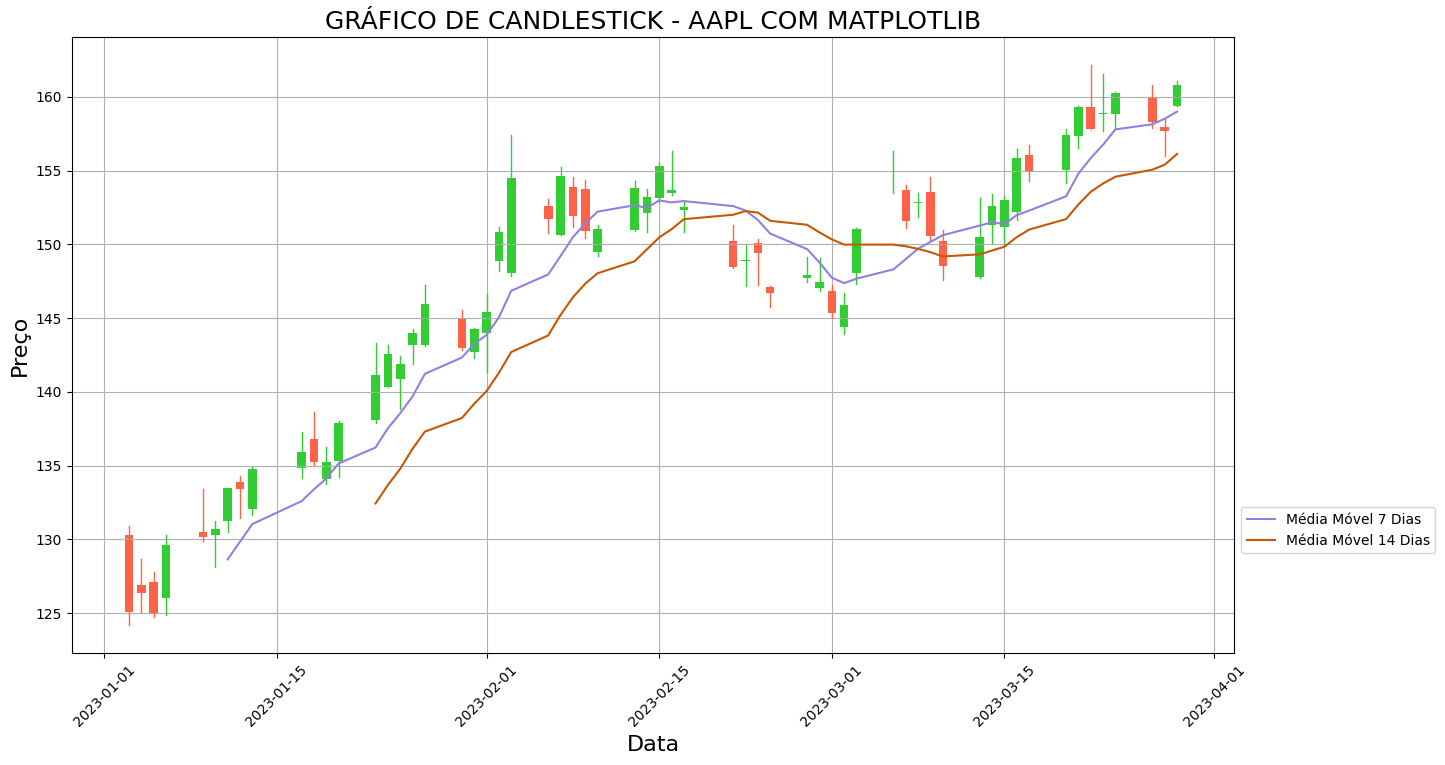

In [ ]:
# Criação da figura e eixos
fig, ax = plt.subplots(figsize=(15, 8))

# Vamos definir a largura dos candles no gráfico
width = 0.7

for i in range(len(df)):
    # Determinando a cor do candle
    if df['fechamento'].iloc[i] > df['abertura'].iloc[i]:
        color = 'limegreen'
    else:
        color = 'tomato'

    # Desenhando a linha vertical do candle (mecha)
    ax.plot([df['data'].iloc[i], df['data'].iloc[i]],
            [df['minimo'].iloc[i], df['maximo'].iloc[i]],
            color=color,
            linewidth=1)

    # Desenhando o corpo do candle
    ax.add_patch(plt.Rectangle((df['data'].iloc[i] - width/2, min(df['abertura'].iloc[i], df['fechamento'].iloc[i])),
                               width,
                               abs(df['fechamento'].iloc[i] - df['abertura'].iloc[i]),
                               facecolor=color))

# Cálculo das médias móveis
df['MA7'] = df['fechamento'].rolling(window=7).mean()
df['MA14'] = df['fechamento'].rolling(window=14).mean()

# Plotando as médias móveis
ax.plot(df['data'], df['MA7'], color='#947EDE', label='Média Móvel 7 Dias')
ax.plot(df['data'], df['MA14'], color='#C85704', label='Média Móvel 14 Dias')
# Adicionando legendas para as médias móveis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.2))

# Formatando o eixo x para mostrar as datas
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

# Adicionando título e rótulos para os eixos x e y
plt.title('Gráfico de Candlestick - AAPL com matplotlib'.upper(),fontsize=18)
plt.xlabel('Data',fontsize=16)
plt.ylabel('Preço',fontsize=16)

# Adicionando uma grade para facilitar a visualização dos valores
plt.grid(True)

# Alterando estilo de gráfico e cor da figura
plt.style.use('classic')
plt.rcParams.update({'figure.facecolor': '#E6FAF9'})

# Exibindo o gráfico
plt.show()


#### Gráfico candlestick com plotly

In [ ]:
# Criando subplots
'''
"Primeiro, criamos uma figura que conterá nossos gráficos usando make_subplots.
Isso nos permite ter múltiplos gráficos em uma única visualização.
Aqui, teremos dois subplots: um para o gráfico de candlestick e outro para o volume de transações."

'''
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.1, # Espaçamento vertical entre os plots
                    subplot_titles=('Candlesticks', 'Volume Transacionado'), #Nome do título
                    row_width=[0.2, 0.7]) # Altura de cada um

'''
"No gráfico de candlestick, cada candle representa um dia de negociação,
mostrando o preço de abertura, fechamento, máximo e mínimo. Vamos adicionar este gráfico à nossa figura."
'''
# Adicionando o gráfico de candlestick
fig.add_trace(go.Candlestick(x=df.index,
                             open=df['abertura'],
                             high=df['maximo'],
                             low=df['minimo'],
                             close=df['fechamento'],
                             name='Candlestick'),
                             row=1, col=1)

# Adicionando as médias móveis
# Adicionamos também médias móveis ao mesmo subplot para análise de tendências
fig.add_trace(go.Scatter(x=df.index,
                         y=df['MA7'],
                         mode='lines',
                         name='MA7 - Média Móvel 7 Dias'),
                         row=1, col=1)

fig.add_trace(go.Scatter(x=df.index,
                         y=df['MA14'],
                         mode='lines',
                         name='MA14 - Média Móvel 14 Dias'),
                         row=1, col=1)

# Adicionando o gráfico de barras para o volume
# Em seguida, criamos um gráfico de barras para o volume de transações, que nos dá uma ideia da atividade de negociação naquele dia
fig.add_trace(go.Bar(x=df.index,
                     y=df['volume'],
                     marker_color='#3358D5',
                     name='Volume'),
                     row=2, col=1)

# Atualizando layout
#Finalmente, configuramos o layout da figura, ajustando títulos, formatos de eixo e outras configurações para tornar o gráfico claro e legível.
fig.update_layout(yaxis_title='Preço',
                  xaxis_rangeslider_visible=False,  # Desativa o range slider
                  width=1100, height=600)
# Mostrando o gráfico
fig.show()

###NOTA: Github incapaz de renderizar gráfico gerado com o Plotly

O Plotly é uma biblioteca de visualização de dados interativa que produz gráficos altamente interativos, geralmente em HTML. Esses gráficos requerem JavaScript para funcionar, o que não é suportado no ambiente estático do GitHub.

Como o GitHub renderiza apenas gráficos estáticos, como imagens PNG, JPEG ou SVG, o gráfico foi anexado abaixo em formato de imagem.

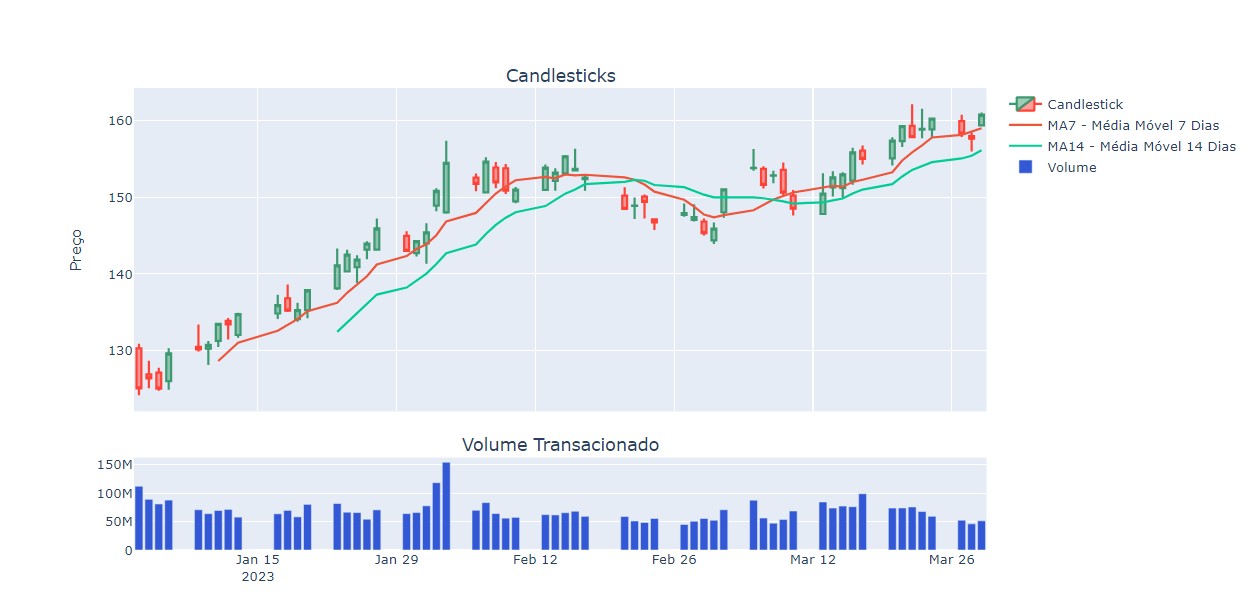

### Extra: Criando gráfico candlestick com mplfinance

[*********************100%%**********************]  1 of 1 completed


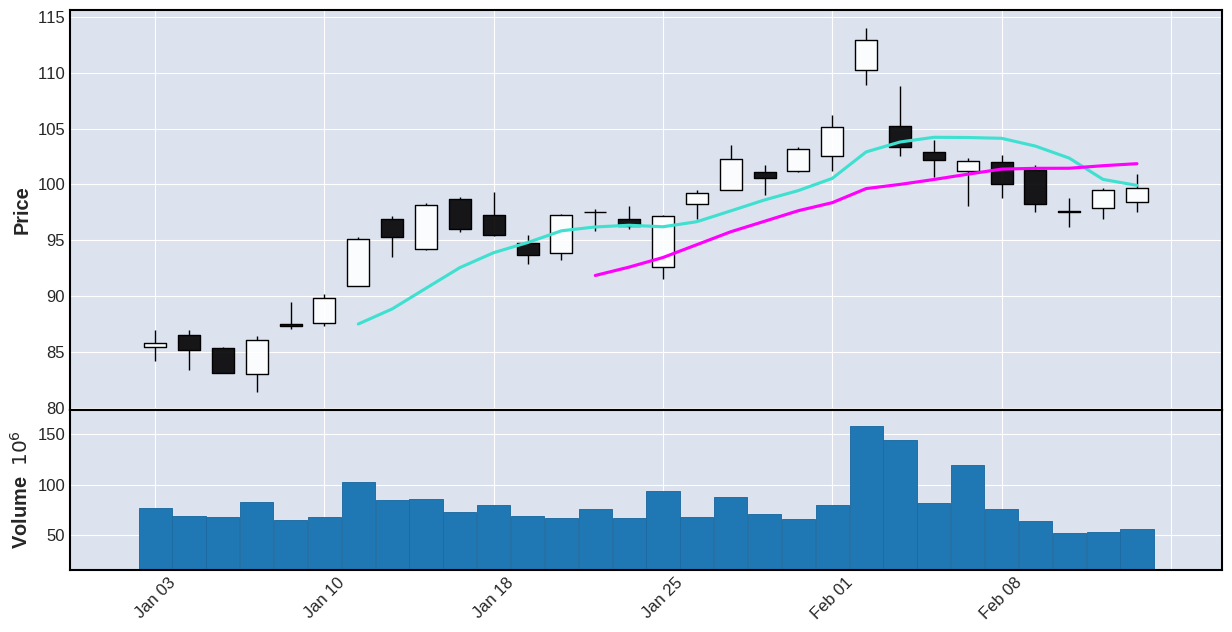

In [ ]:
dados_amazon = yf.download('AMZN', start='2023-01-01', end='2023-12-31')
mpf.plot(dados_amazon.head(30), type='candle', figsize = (16,8), volume=True, mav=(7,14))